<a href="https://colab.research.google.com/github/Arkasom/Machine_Learning_Works/blob/main/Task_1_Level_2_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK-1(Level-2(Intermediate))

# Description: Implement a logistic regression model to predict binary outcomes (e.g., whether a customer will churn).

# Objectives

* Load and preprocess the dataset.
* Train a logistic regression model using scikit-learn.
* Interpret model coefficients and the odds ratio.
* Evaluate the model using metrics such as accuracy,precision, recall, and the ROC curve.
* Tools: Python, pandas, scikit-learn, matplotlib.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('churn-bigml-20.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
df.shape

(667, 20)

In [ ]:
df.dtypes

,0
State,object
Account length,int64
Area code,int64
International plan,object
Voice mail plan,object
Number vmail messages,int64
Total day minutes,float64
Total day calls,int64
Total day charge,float64
Total eve minutes,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [ ]:
df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


# Preprocessing

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(numerical_cols)
print(categorical_cols)

['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
['State', 'International plan', 'Voice mail plan', 'Churn']


In [ ]:
df[categorical_cols]

,State,International plan,Voice mail plan,Churn
0,LA,No,No,False
1,IN,No,No,True
2,NY,No,No,True
3,SC,No,No,False
4,HI,No,No,False
...,...,...,...,...
662,WI,No,Yes,False
663,AL,No,Yes,False
664,VT,No,No,False
665,WV,No,No,False


In [ ]:
df[numerical_cols]

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
663,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
664,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
665,159,415,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


# Standardize and Encoding of numerical and categorical columns

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
for col in categorical_cols:
  print(df[col].nunique())
  if df[col].nunique() == 2:
    df[col] = LabelEncoder().fit_transform(df[col])

51
2
2
2


In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,0.347127,-0.674397,0,0,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,0.323581,-0.548297,-0.212747,-0.547714,-0.423098,0
1,IN,-0.927731,-0.506741,0,0,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,0.185049,0.877350,0.593516,0.877843,1.828550,1
2,NY,1.425853,-0.506741,0,0,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,1.383417,-0.784675,-1.724455,1.802910,-1.722480,1.828550,1
3,SC,0.200028,-0.506741,0,0,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,0.242395,-0.203735,-0.904709,0.593516,-0.904104,0.327451,0
4,HI,-1.319994,1.768601,0,0,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,-0.501749,-0.422705,0.307091,-1.422141,0.310260,-0.423098,0


# Dropped 'State' due to high cardinality

In [ ]:
df = df.drop(df[['State']],axis=1)

In [ ]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.347127,-0.674397,0,0,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,0.323581,-0.548297,-0.212747,-0.547714,-0.423098,0
1,-0.927731,-0.506741,0,0,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,0.185049,0.877350,0.593516,0.877843,1.828550,1
2,1.425853,-0.506741,0,0,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,1.383417,-0.784675,-1.724455,1.802910,-1.722480,1.828550,1
3,0.200028,-0.506741,0,0,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,0.242395,-0.203735,-0.904709,0.593516,-0.904104,0.327451,0
4,-1.319994,1.768601,0,0,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,-0.501749,-0.422705,0.307091,-1.422141,0.310260,-0.423098,0


# Drop the Target Column

In [ ]:
X = df.drop(df[['Churn']],axis=1)
y = df['Churn']
print(X.head())
print(y.head())

   Account length  Area code  International plan  Voice mail plan  \
0        0.347127  -0.674397                   0                0   
1       -0.927731  -0.506741                   0                0   
2        1.425853  -0.506741                   0                0   
3        0.200028  -0.506741                   0                0   
4       -1.319994   1.768601                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0              -0.601245           0.064036        -0.193167   
1              -0.601245          -0.934756         1.769398   
2              -0.601245           2.739500        -1.665090   
3              -0.601245          -1.271894         0.101218   
4              -0.601245          -1.111438         0.788115   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0          0.064504           2.983872        -1.081478          2.984789   
1         -0.934501           0.506113        

In [ ]:
X.isnull().sum()

,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0
Total eve calls,0


# Split the dataset for train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Importing logistic regression model and train and test the model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lg.predict(X_test)

# importing metrics

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(cm)
print(cr)

[[143   3]
 [ 13   8]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       146
           1       0.73      0.38      0.50        21

    accuracy                           0.90       167
   macro avg       0.82      0.68      0.72       167
weighted avg       0.89      0.90      0.89       167



# Accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f"{accuracy:.4f}")

0.9042


# ROC AUC score

In [ ]:
roc_auc = roc_auc_score(y_test,y_pred)
print(f"{roc_auc:.4f}")

0.6802


# Confusion Matrix Visualization

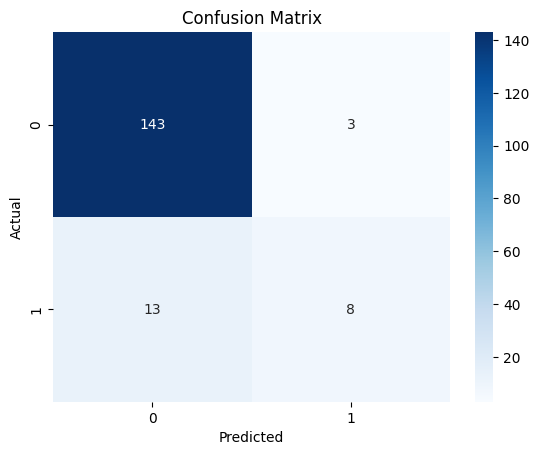

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve

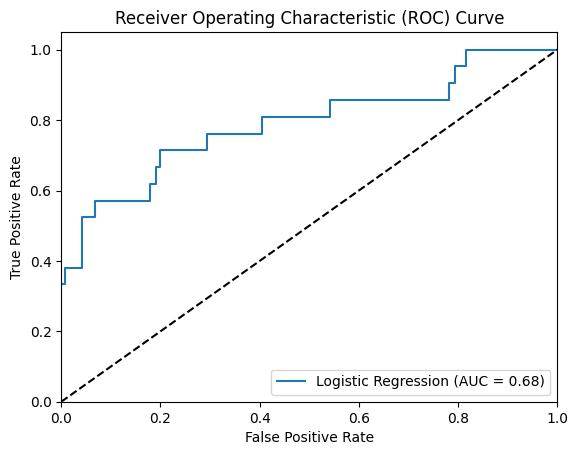

In [ ]:
y_pred_proba = lg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Get coefficients and odds ratios

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lg.coef_[0],
    'Odds Ratio': np.exp(lg.coef_[0])
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                   Feature  Coefficient  Odds Ratio
2       International plan     1.380200    3.975698
17  Customer service calls     0.614735    1.849166
7         Total day charge     0.433627    1.542844
5        Total day minutes     0.433391    1.542479
10        Total eve charge     0.321815    1.379629
8        Total eve minutes     0.316917    1.372889
9          Total eve calls     0.259817    1.296693
11     Total night minutes     0.169654    1.184894
13      Total night charge     0.168923    1.184029
16       Total intl charge     0.107582    1.113582
0           Account length     0.094681    1.099308
14      Total intl minutes     0.065652    1.067855
6          Total day calls     0.059412    1.061212
15        Total intl calls    -0.049551    0.951656
12       Total night calls    -0.049665    0.951548
1                Area code    -0.149678    0.860985
3          Voice mail plan    -0.306682    0.735885
4    Number vmail messages    -0.390685    0.676593
